In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from folium.plugins import HeatMap

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)  
sns.set_palette('viridis')
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("output.csv")

In [4]:
df.head(5)

,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,State,Timezone,Weather_Timestamp,Temperature(F),Weather_Condition,Amenity,Bump,Crossing,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,3,2016-02-08 05:46:00,39.865,-84.059,I-70 E,Dayton,Montgomery,OH,US/Eastern,2016-02-08 05:58:00,36.900,Light Rain,False,False,False,False,False,False,False,False,False,False,Night
1,2,2016-02-08 06:07:59,39.928,-82.831,Brice Rd,Reynoldsburg,Franklin,OH,US/Eastern,2016-02-08 05:51:00,37.900,Light Rain,False,False,False,False,False,False,False,False,False,False,Night
2,2,2016-02-08 06:49:27,39.063,-84.033,State Route 32,Williamsburg,Clermont,OH,US/Eastern,2016-02-08 06:56:00,36.000,Overcast,False,False,False,False,False,False,False,False,True,False,Night
3,3,2016-02-08 07:23:34,39.748,-84.206,I-75 S,Dayton,Montgomery,OH,US/Eastern,2016-02-08 07:38:00,35.100,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,Night
4,2,2016-02-08 07:39:07,39.628,-84.188,Miamisburg Centerville Rd,Dayton,Montgomery,OH,US/Eastern,2016-02-08 07:53:00,36.000,Mostly Cloudy,False,False,False,False,False,False,False,False,True,False,Day


In [5]:
continous = ["Start_Lat", "Start_Lng", "Temperature(F)"]
count = ["Severity"]
categorical = ["Street", "City","County", "State", "Timezone", "Weather_Condition", "Sunrise_Sunset", "Amenity", "Bump", "Crossing", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Signal", "Turning_Loop"]
timeseries = ["Start_Time", "Weather_Timestamp"]

In [6]:
df[continous].describe()

,Start_Lat,Start_Lng,Temperature(F)
count,7728394.000,7728394.000,7564541.000
mean,36.201,-94.703,61.663
std,5.076,17.392,19.014
min,24.555,-124.624,-89.000
25%,33.400,-117.219,49.000
50%,35.824,-87.767,64.000
75%,40.085,-80.354,76.000
max,49.002,-67.113,207.000


### *Data Exploration*

**Univariate analysis (Start Lat)**

In [8]:
df["Start_Lat"].value_counts()

Start_Lat
37.808    570
33.941    568
34.859    545
42.477    534
33.745    533
         ... 
40.855      1
38.224      1
41.525      1
41.521      1
34.239      1
Name: count, Length: 2428358, dtype: int64

<Axes: xlabel='Start_Lat', ylabel='Count'>

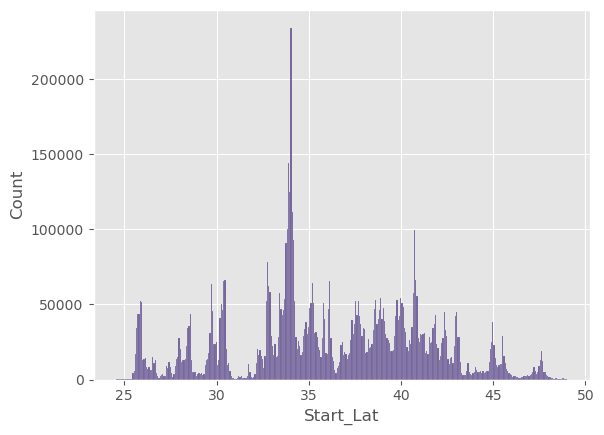

In [7]:
sns.histplot(data = df, x = "Start_Lat")

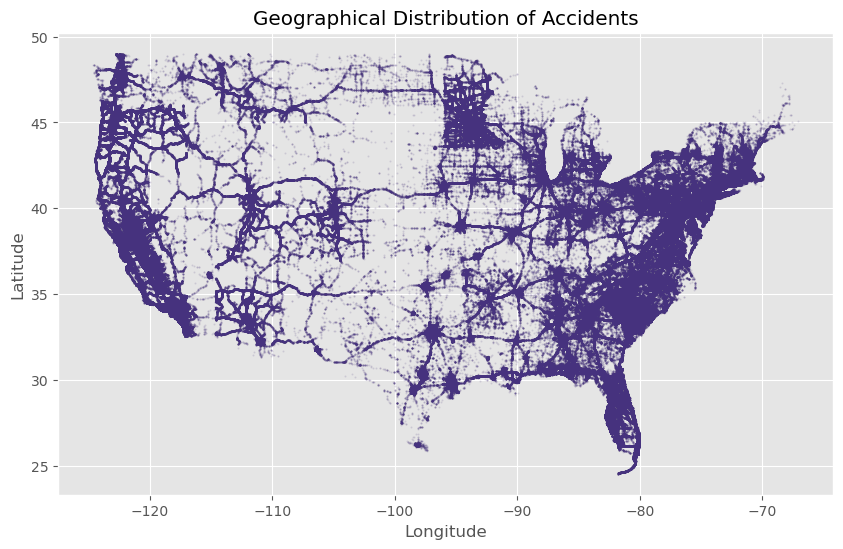

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Start_Lng'], df['Start_Lat'], alpha=0.1, s=1)
plt.title('Geographical Distribution of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [17]:
# Sample first 10,000 rows to avoid browser lag
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

# Create base map centered in the US
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add heatmap
HeatMap(data=sample_df[['Start_Lat', 'Start_Lng']].values, radius=8).add_to(m)

m.save('accident_heatmap.html')

# Show map
m